<a href="https://colab.research.google.com/github/anaapbernardo/Bootcamp_DataScience/blob/main/Challenges_Bootcamp_Data_Science_Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Links:

https://www.mathworks.com/help/econ/autocorrelation-and-partial-autocorrelation.html

https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima_model.ARIMA.html


In [ ]:
#!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.5MB/s 
     |████████████████████████████████| 2.1MB 17.4MB/s 
     |████████████████████████████████| 9.5MB 21.1MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

# **Tuberculosis**

# Time Series

## 1.1. What is a time series?

In [ ]:
tuberculosis_cases = 'https://raw.githubusercontent.com/anaapbernardo/Bootcamp_DataScience/main/Files%20-%20Bootcamp%20Data%20Science/A094554189_28_143_208.csv'

In [ ]:
df = pd.read_csv(tuberculosis_cases, encoding='ISO 8859-1', sep=';',
                 skiprows=3, skipfooter=16, engine='python')

df

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151,85031
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094,84600
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574,86768
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723,86318
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176,85381


### Challenge 01: Transform the data frame into a time series (year-month)

In [ ]:
# Removing 'Total' (column and row)

df.drop('Total', axis=1, inplace=True)
df.drop(19, inplace=True)

In [ ]:
# Melting data frame and renaming columns

df_date = df.melt(id_vars='Ano Diagnóstico', var_name='Month', value_name='Number_Cases')
df_date.rename(columns={'Ano Diagnóstico': 'Year'}, inplace=True)

df_date

,Year,Month,Number_Cases
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


### Challenge 02: Convert date (str) to datetime

In [ ]:
# Dictionary used to convert months into numbers

months_dict = {
    'Jan' : '01',
    'Fev' : '02',
    'Mar' : '03',
    'Abr' : '04',
    'Mai' : '05',
    'Jun' : '06',
    'Jul' : '07',
    'Ago' : '08',
    'Set' : '09',
    'Out' : '10',
    'Nov' : '11',
    'Dez' : '12'
}

In [ ]:
df_date['Month'] = df_date['Month'].map(months_dict)
df_date['Date'] = df_date['Year'].str.cat(df_date['Month'], sep='-')
df_date['Date'] = pd.to_datetime(df_date['Date'], format='%Y-%m')

df_date

,Year,Month,Number_Cases,Date
0,2001,01,8088,2001-01-01
1,2002,01,8013,2002-01-01
2,2003,01,8115,2003-01-01
3,2004,01,7574,2004-01-01
4,2005,01,7432,2005-01-01
...,...,...,...,...
223,2015,12,6844,2015-12-01
224,2016,12,6672,2016-12-01
225,2017,12,7020,2017-12-01
226,2018,12,6900,2018-12-01


In [ ]:
# Creating a new data frame and sorting by date

selected_columns = ['Date', 'Number_Cases']
df_timeseries = df_date.reindex(columns=selected_columns)
df_timeseries.sort_values('Date', inplace=True)
df_timeseries.reset_index(drop=True, inplace=True)

df_timeseries

,Date,Number_Cases
0,2001-01-01,8088
1,2001-02-01,6542
2,2001-03-01,8095
3,2001-04-01,7305
4,2001-05-01,7656
...,...,...
223,2019-08-01,8239
224,2019-09-01,8143
225,2019-10-01,8592
226,2019-11-01,7615


## 1.2. Preparing the data

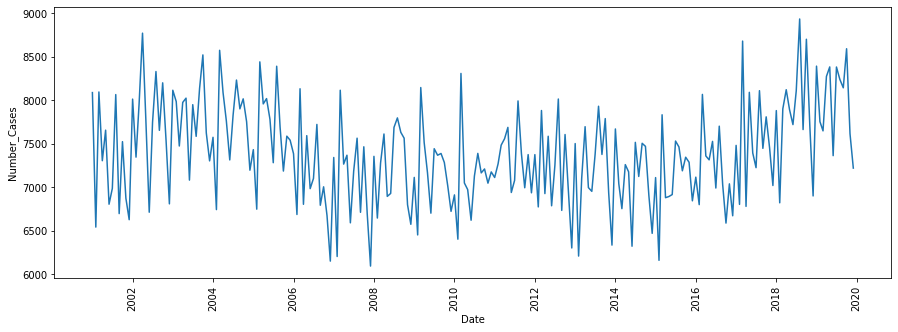

In [ ]:
# Visualizing the data

plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries)
plt.xticks(rotation = 90)
plt.show()

### Challenge 03: Improve the data visualization (Labels size, legend, title, etc)

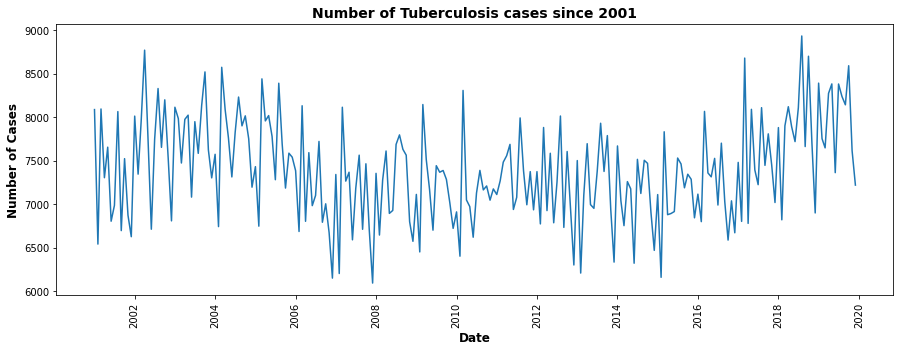

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries)

plt.xticks(rotation = 90)
plt.xlabel('Date', size=12, weight='bold')
plt.ylabel('Number of Cases', size=12, weight='bold')
plt.title('Number of Tuberculosis cases since 2001', size=14, weight='bold')

plt.show()

# 2. Time Series Analysis

## 2.1. Trends and Moving Averages

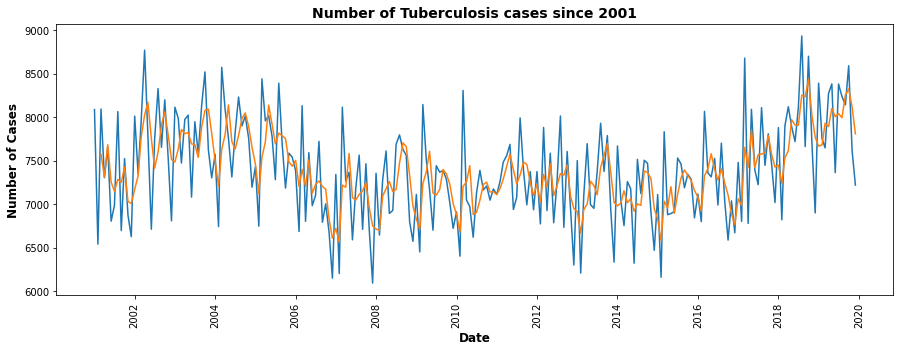

In [ ]:
# Moving average of 3 months

df_timeseries['Moving_Avg3'] = df_timeseries['Number_Cases'].rolling(3).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries)
sns.lineplot(x='Date', y='Moving_Avg3', data=df_timeseries)

plt.xticks(rotation = 90)
plt.xlabel('Date', size=12, weight='bold')
plt.ylabel('Number of Cases', size=12, weight='bold')
plt.title('Number of Tuberculosis cases since 2001', size=14, weight='bold')

plt.show()

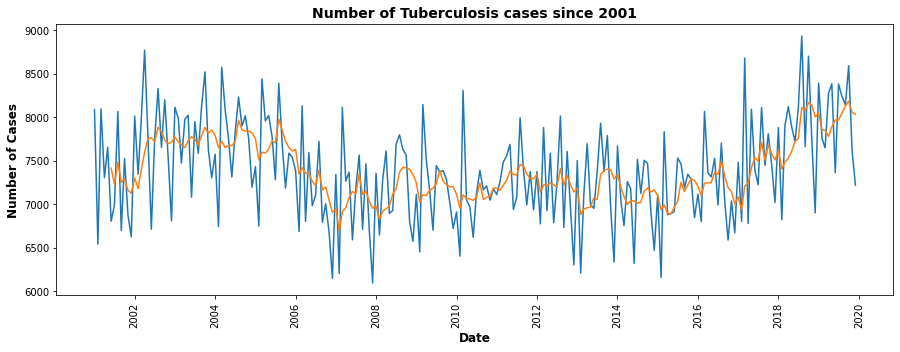

In [ ]:
# Moving average of 6 months

df_timeseries['Moving_Avg6'] = df_timeseries['Number_Cases'].rolling(6).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries)
sns.lineplot(x='Date', y='Moving_Avg6', data=df_timeseries)

plt.xticks(rotation = 90)
plt.xlabel('Date', size=12, weight='bold')
plt.ylabel('Number of Cases', size=12, weight='bold')
plt.title('Number of Tuberculosis cases since 2001', size=14, weight='bold')

plt.show()

With the moving average of 6 months it is possible to observe an increasing trend after 2017.

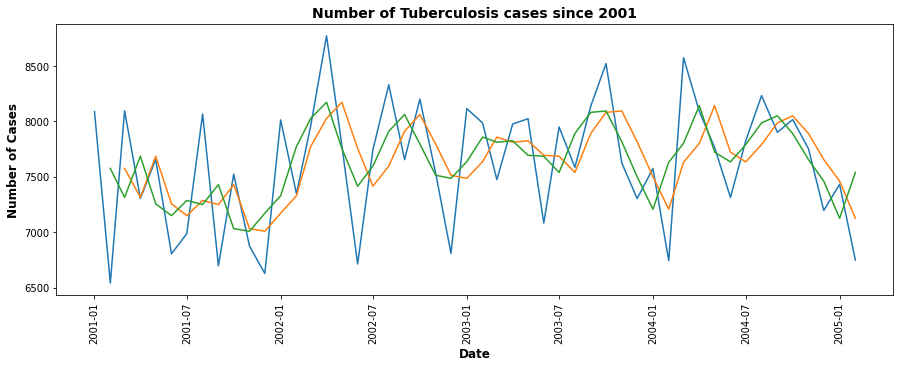

In [ ]:
# Centering the moving average

df_timeseries['Moving_Avg3c'] = df_timeseries['Number_Cases'].rolling(3, center=True).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries[:50])
sns.lineplot(x='Date', y='Moving_Avg3', data=df_timeseries[:50])
sns.lineplot(x='Date', y='Moving_Avg3c', data=df_timeseries[:50])

plt.xticks(rotation = 90)
plt.xlabel('Date', size=12, weight='bold')
plt.ylabel('Number of Cases', size=12, weight='bold')
plt.title('Number of Tuberculosis cases since 2001', size=14, weight='bold')

plt.show()

### Challenge 04: Repeat the analysis using different time windows (rolling) for the moving average

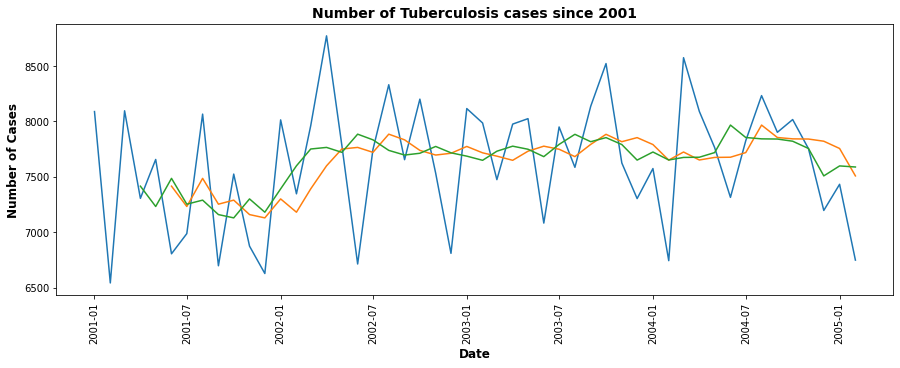

In [ ]:
df_timeseries['Moving_Avg6c'] = df_timeseries['Number_Cases'].rolling(6, center=True).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries[:50])
sns.lineplot(x='Date', y='Moving_Avg6', data=df_timeseries[:50])
sns.lineplot(x='Date', y='Moving_Avg6c', data=df_timeseries[:50])

plt.xticks(rotation = 90)
plt.xlabel('Date', size=12, weight='bold')
plt.ylabel('Number of Cases', size=12, weight='bold')
plt.title('Number of Tuberculosis cases since 2001', size=14, weight='bold')

plt.show()

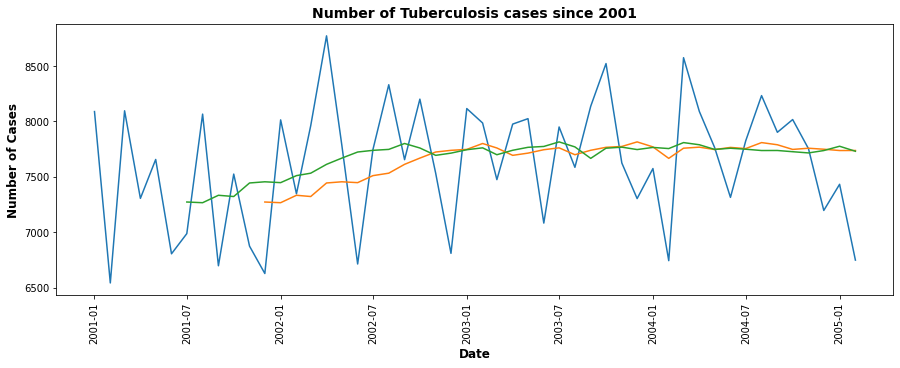

In [ ]:
df_timeseries['Moving_Avg12'] = df_timeseries['Number_Cases'].rolling(12).mean()
df_timeseries['Moving_Avg12c'] = df_timeseries['Number_Cases'].rolling(12, center=True).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries[:50])
sns.lineplot(x='Date', y='Moving_Avg12', data=df_timeseries[:50])
sns.lineplot(x='Date', y='Moving_Avg12c', data=df_timeseries[:50])

plt.xticks(rotation = 90)
plt.xlabel('Date', size=12, weight='bold')
plt.ylabel('Number of Cases', size=12, weight='bold')
plt.title('Number of Tuberculosis cases since 2001', size=14, weight='bold')

plt.show()

Increasing the time window turns the moving average more linear and less noisy, consequently has less information.

### Challenge 05: Make a prediction using averages

In [ ]:
mean_total = df_timeseries['Number_Cases'].mean()
mean_2019 = df_timeseries[216:]['Number_Cases'].mean()
mean_2S2019 = df_timeseries[222:]['Number_Cases'].mean()
mean_4T2019 = df_timeseries[225:]['Number_Cases'].mean()

print(f'Means \n Time Serie: {"%.2f" % mean_total} \n Last Year: {"%.2f" % mean_2019} \n Last 6 Months: {"%.2f" % mean_2S2019} \n Last 3 Months: {"%.2f" % mean_4T2019}')

Means 
 Time Serie: 7389.29 
 Last Year: 8000.42 
 Last 6 Months: 8031.83 
 Last 3 Months: 7809.00


Based on the averages, it is possible to predict that January 2020 will have about 7,800 cases.

# 3. Decomposition and Autocorrelation

## 3.1. Finding patterns

Evaluating different periods (years) to find patterns in the time series.

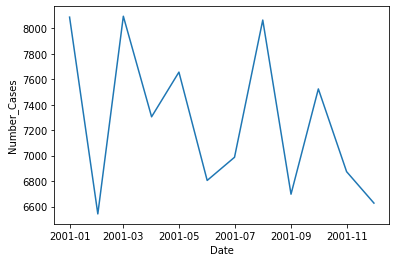

In [ ]:
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries[:12])

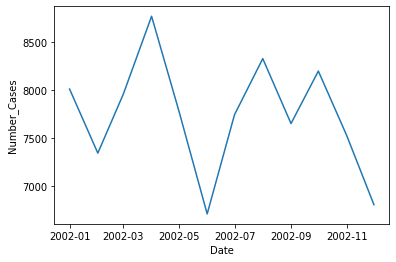

In [ ]:
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries[12:24])

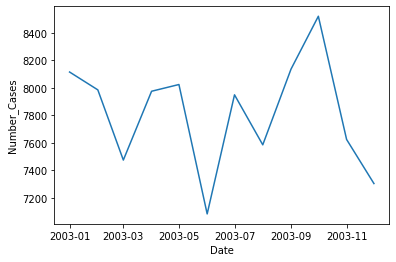

In [ ]:
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries[24:36])

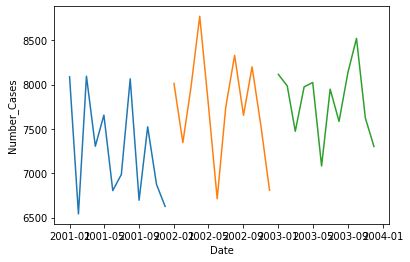

In [ ]:
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries[:12])
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries[12:24])
sns.lineplot(x='Date', y='Number_Cases', data=df_timeseries[24:36])

Looking at the graphs above, it is hard to analyze and compare any pattern.

In [ ]:
df_timeseries

,Date,Number_Cases,Moving_Avg3,Moving_Avg6,Moving_Avg3c,Moving_Avg6c,Moving_Avg12,Moving_Avg12c
0,2001-01-01,8088,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-02-01,6542,NaN,NaN,7575.000000,NaN,NaN,NaN
2,2001-03-01,8095,7575.000000,NaN,7314.000000,NaN,NaN,NaN
3,2001-04-01,7305,7314.000000,NaN,7685.333333,7415.166667,NaN,NaN
4,2001-05-01,7656,7685.333333,NaN,7255.333333,7231.666667,NaN,NaN
...,...,...,...,...,...,...,...,...
223,2019-08-01,8239,7994.666667,8048.166667,8254.666667,8183.666667,7950.833333,NaN
224,2019-09-01,8143,8254.666667,8130.666667,8324.666667,8055.666667,7990.833333,NaN
225,2019-10-01,8592,8324.666667,8183.666667,8116.666667,8031.833333,7981.750000,NaN
226,2019-11-01,7615,8116.666667,8055.666667,7809.000000,NaN,7973.750000,NaN


In [ ]:
# Slice the date into year and month

df_timeseries['Year'] = df_timeseries['Date'].dt.year
df_timeseries['Month'] = df_timeseries['Date'].dt.month

# Reordering the columns
df_timeseries = df_timeseries[['Date', 'Year', 'Month', 'Number_Cases', 'Moving_Avg3', 'Moving_Avg6', 'Moving_Avg12', 'Moving_Avg3c', 'Moving_Avg6c', 'Moving_Avg12c']]

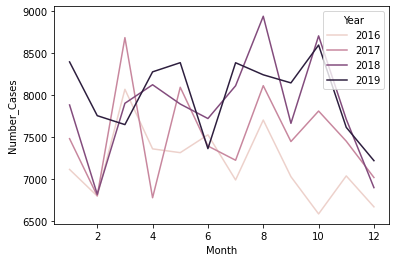

In [ ]:
sns.lineplot(x='Month', y='Number_Cases', data=df_timeseries.query('Year in [2019, 2018, 2017, 2016]'), hue='Year')

### Challenge 06: Convert the "Date" column to index

In [ ]:
df_timeseries.set_index('Date', inplace=True)

In [ ]:
df_timeseries

,Year,Month,Number_Cases,Moving_Avg3,Moving_Avg6,Moving_Avg12,Moving_Avg3c,Moving_Avg6c,Moving_Avg12c
Date,,,,,,,,,
2001-01-01,2001,1,8088,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,2001,2,6542,NaN,NaN,NaN,7575.000000,NaN,NaN
2001-03-01,2001,3,8095,7575.000000,NaN,NaN,7314.000000,NaN,NaN
2001-04-01,2001,4,7305,7314.000000,NaN,NaN,7685.333333,7415.166667,NaN
2001-05-01,2001,5,7656,7685.333333,NaN,NaN,7255.333333,7231.666667,NaN
...,...,...,...,...,...,...,...,...,...
2019-08-01,2019,8,8239,7994.666667,8048.166667,7950.833333,8254.666667,8183.666667,NaN
2019-09-01,2019,9,8143,8254.666667,8130.666667,7990.833333,8324.666667,8055.666667,NaN
2019-10-01,2019,10,8592,8324.666667,8183.666667,7981.750000,8116.666667,8031.833333,NaN


## 3.1.1. Decomposing the time series

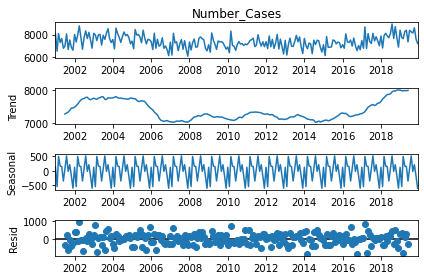

In [ ]:
# Using seasonal decompose from the statsmodels
# Additive model

decompose = seasonal_decompose(df_timeseries['Number_Cases'])
decompose.plot();

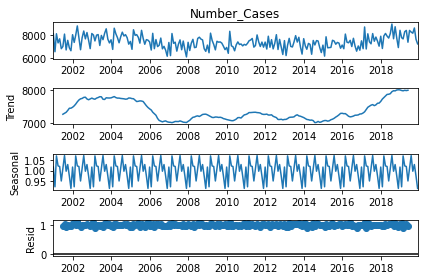

In [ ]:
# Multiplicative model

decompose = seasonal_decompose(df_timeseries['Number_Cases'], model='multiplicative')
decompose.plot();

Comparing both models it is possible to notice a similar behavior in the graphs. However, the multiplicative model showed a lower residual number, which is better to explain the graphs.

### Challenge 07: Format the decompose graphs (title and size)

Text(0.5, 14.999999999999972, 'Year')

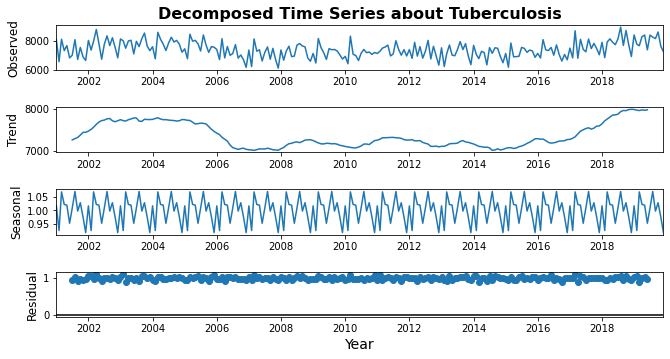

In [ ]:
figure = decompose.plot()

figure.set_size_inches(10, 5)
figure.axes[0].set_title('Decomposed Time Series about Tuberculosis', fontsize=16, fontweight='bold')

figure.axes[0].set_ylabel('Observed', fontsize=12)
figure.axes[1].set_ylabel('Trend', fontsize=12)
figure.axes[2].set_ylabel('Seasonal', fontsize=12)
figure.axes[3].set_ylabel('Residual', fontsize=12)

figure.axes[3].set_xlabel('Year', fontsize=14)

## 3.2. Autocorrelation and Partil Autocorrelation

Autocorrelation is the correlation of the time series with it self in different time periods (look the moving average). So, the 1st lag is always 1 because it the time series compared with it self, the other lags are compared with different periods. The shadow is the confidence interval, and lags under this interval are not correlated.

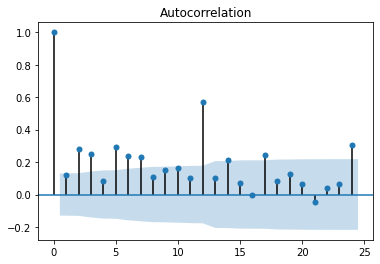

In [ ]:
# Autocorrelation

plot_acf(df_timeseries['Number_Cases']);

According to the graph above, it is possible to notice a higher autocorrelation in the lag 12.

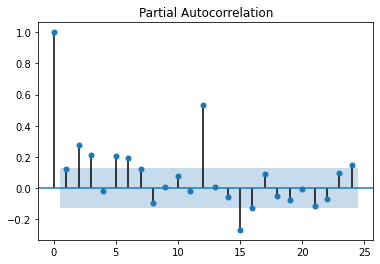

In [ ]:
# Partial Autocorrelation

plot_pacf(df_timeseries['Number_Cases']);

The graph above it the partial autocorrelation, which means that the lags are normalized according to the lag number 1.

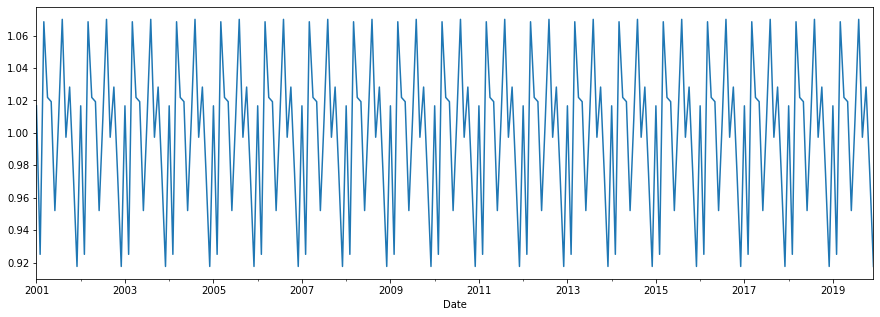

In [ ]:
plt.figure(figsize=(15, 5))

decompose.seasonal.plot()

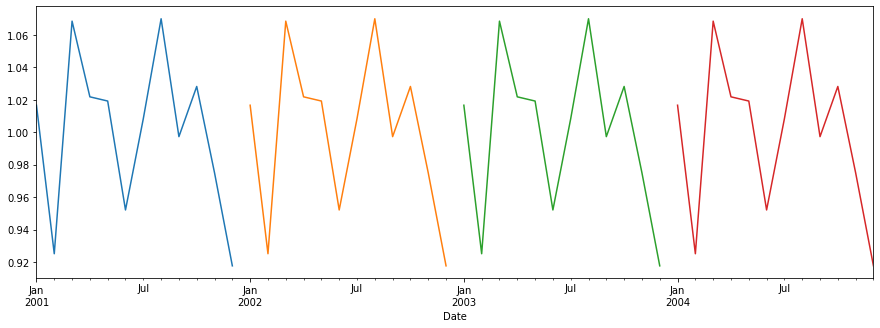

In [ ]:
plt.figure(figsize=(15, 5))

decompose.seasonal[:12].plot()
decompose.seasonal[12:24].plot()
decompose.seasonal[24:36].plot()
decompose.seasonal[36:48].plot()

Observing the graphs above it is possible to notice a seasonality in the tuberculosis cases, which showed higher values in the months of April and August.

# 4. Time Series Predictions

## 4.1. ARIMA Predictions

In [ ]:
# Select the train and test data

data_train = df_timeseries.query('Year != 2019')
data_test = df_timeseries.query('Year == 2019')

In [ ]:
# Set and train the ARIMA model

arima_model = ARIMA(data_train['Number_Cases'].values.astype('float32'), order=[0, 0, 0])
trained_arima_model = arima_model.fit()
prediction = trained_arima_model.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [ ]:
prediction

array([7355.33333559, 7355.33333559, 7355.33333559, 7355.33333559,
       7355.33333559, 7355.33333559, 7355.33333559, 7355.33333559,
       7355.33333559, 7355.33333559, 7355.33333559, 7355.33333559])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



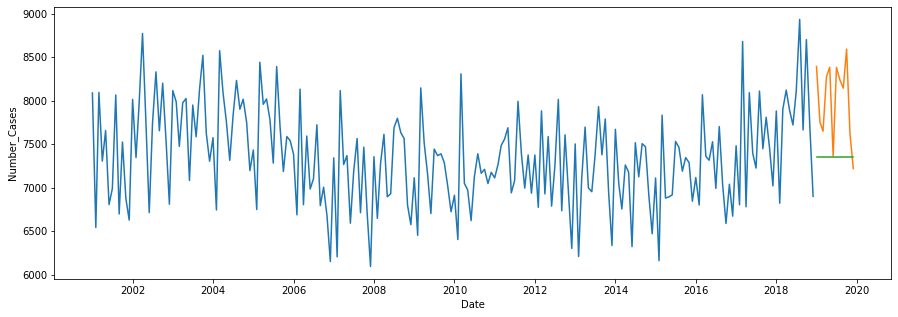

In [ ]:
data_test['Prediction'] = prediction

plt.figure(figsize=(15,5))

sns.lineplot(x='Date', y='Number_Cases', data=data_train)
sns.lineplot(x='Date', y='Number_Cases', data=data_test)
sns.lineplot(x='Date', y='Prediction', data=data_test)

### Challenge 08: What are the returns (arrays) of the ARIMA forecast?

**1st array:** the prediction (if the ARIMA is order 0, the forecast is the average of the whole data).

**2nd array:** standard error.

**3rd array:** confidence interval.

## 4.2. Adjusting the parameters

The ARIMA model has a parameter order (p,d,q), that is used to adjust the model to make a better prediction.

The parameters (p,d,q) are:

p: AR parameters

d: differences

q: MA parameters

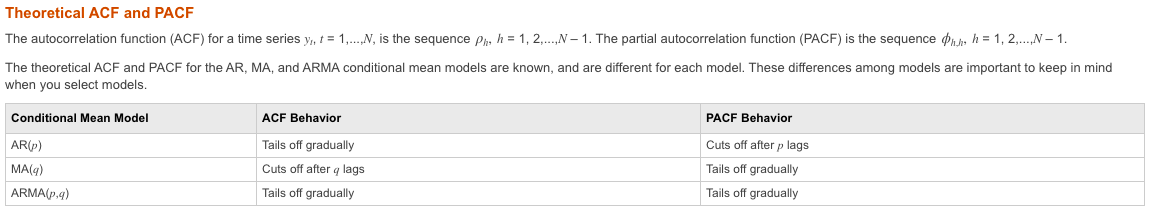

The ARIMA model considers that the data is stationary, which means that the values change around the average. So, the parameter d is used to differentiate the curves from a non-stationary model.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

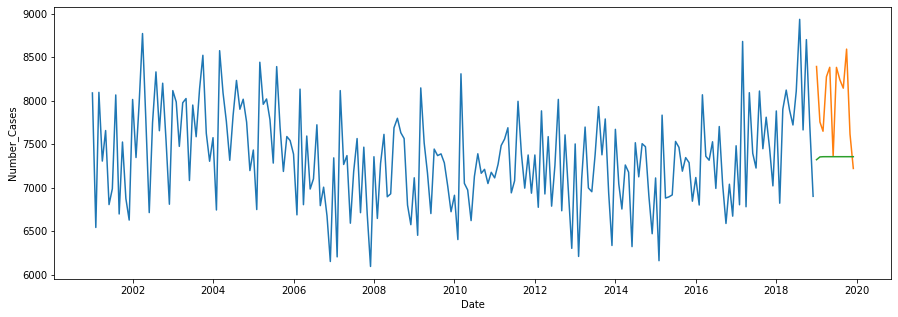

In [ ]:
# Order p = 1 (Autoregressive model)

arima_model = ARIMA(data_train['Number_Cases'].values.astype('float32'), order=[1, 0, 0])
trained_arima_model = arima_model.fit()
prediction = trained_arima_model.forecast(12)[0]

data_test['Prediction_p'] = prediction

plt.figure(figsize=(15,5))

sns.lineplot(x='Date', y='Number_Cases', data=data_train)
sns.lineplot(x='Date', y='Number_Cases', data=data_test)
sns.lineplot(x='Date', y='Prediction_p', data=data_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

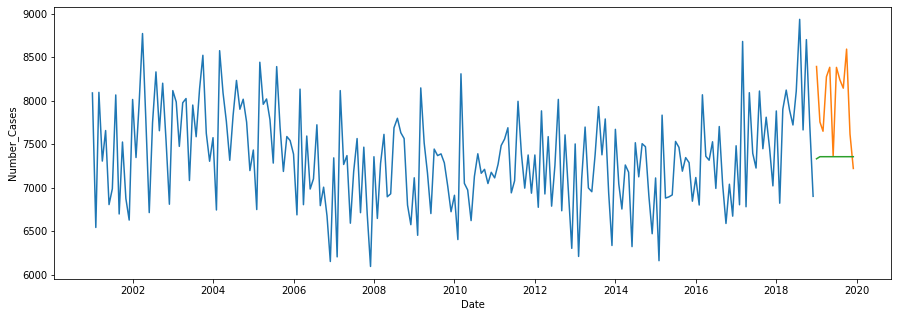

In [ ]:
# Order q = 1 (Moving average model)

arima_model = ARIMA(data_train['Number_Cases'].values.astype('float32'), order=[0, 0, 1])
trained_arima_model = arima_model.fit()
prediction = trained_arima_model.forecast(12)[0]

data_test['Prediction_q'] = prediction

plt.figure(figsize=(15,5))

sns.lineplot(x='Date', y='Number_Cases', data=data_train)
sns.lineplot(x='Date', y='Number_Cases', data=data_test)
sns.lineplot(x='Date', y='Prediction_q', data=data_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

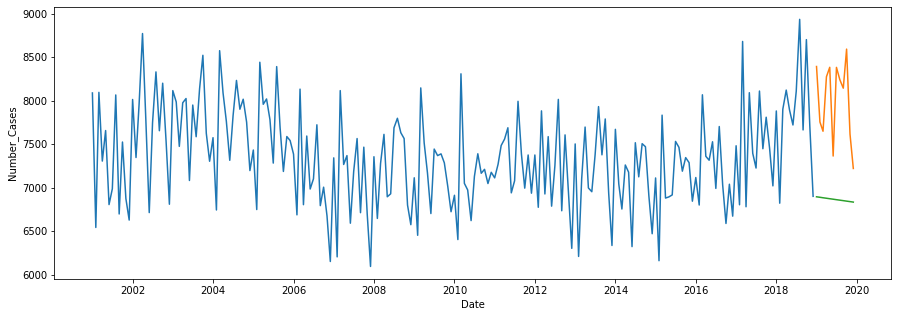

In [ ]:
# Order d = 1 (differentiate)

arima_model = ARIMA(data_train['Number_Cases'].values.astype('float32'), order=[0, 1, 0])
trained_arima_model = arima_model.fit()
prediction = trained_arima_model.forecast(12)[0]

data_test['Prediction_d'] = prediction

plt.figure(figsize=(15,5))

sns.lineplot(x='Date', y='Number_Cases', data=data_train)
sns.lineplot(x='Date', y='Number_Cases', data=data_test)
sns.lineplot(x='Date', y='Prediction_d', data=data_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

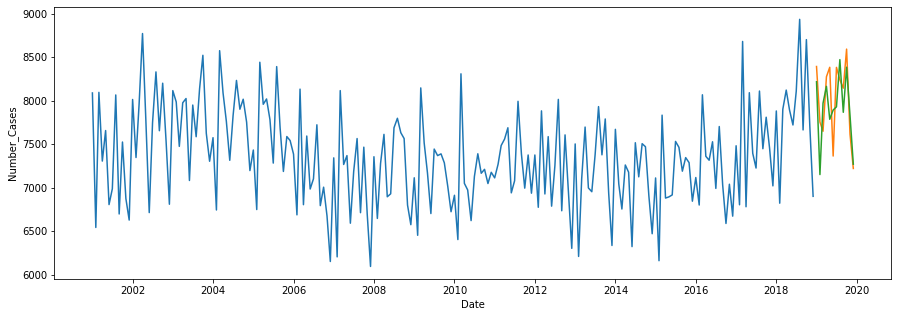

In [ ]:
# Order p = 12, d = 1, q = 2

arima_model = ARIMA(data_train['Number_Cases'].values.astype('float32'), order=[12, 1, 2])
trained_arima_model = arima_model.fit()
prediction = trained_arima_model.forecast(12)[0]

data_test['Prediction_pdq'] = prediction

plt.figure(figsize=(15,5))

sns.lineplot(x='Date', y='Number_Cases', data=data_train)
sns.lineplot(x='Date', y='Number_Cases', data=data_test)
sns.lineplot(x='Date', y='Prediction_pdq', data=data_test)

# 5. AUTOARIMA and Prophet

## 5.1. Evaluation Metrics and AUTOARIMA

In [ ]:
# Create an autoarima model

autoarima_model = auto_arima(data_train['Number_Cases'].values, error_action='ignore',
                             trace=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.17 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=1.99 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.30 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=1.26 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=2.45 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.94 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.90 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



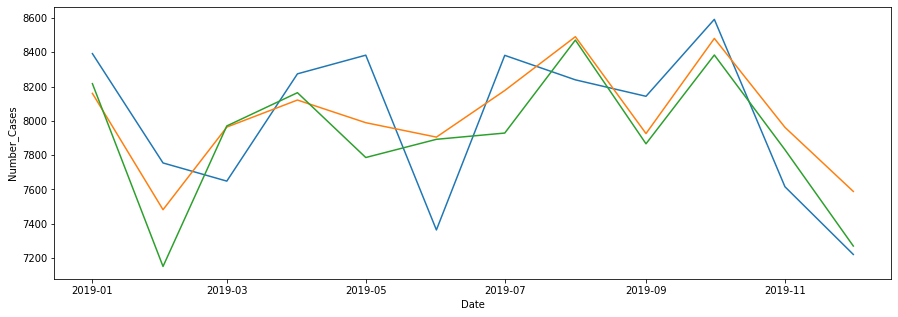

In [ ]:
# Plot the prediction models

prediction_autoarima = autoarima_model.predict(12)
data_test["Prediction_Autoarima"] = prediction_autoarima

plt.figure(figsize=(15,5))

sns.lineplot(x='Date', y='Number_Cases', data=data_test) #blue
sns.lineplot(x='Date', y='Prediction_Autoarima', data=data_test) #orange
sns.lineplot(x='Date', y='Prediction_pdq', data=data_test) #green

Through visual analysis, it is possible to notice that both models (ARIMA and AUTOARIMA) showed a good prediction. However, it is not possible to define which one is better. Thus, a mean squared error metric will be conducted to verify which model had the best fit.

In [ ]:
autoarima_results = mean_squared_error(data_test['Number_Cases'], data_test['Prediction_Autoarima'])
arima_results = mean_squared_error(data_test['Number_Cases'], data_test['Prediction_pdq'])

print(f'MSE: \n Autoarima:{"%.2f" % autoarima_results} \n Arima:{"%.2f" % arima_results}')

MSE: 
 Autoarima:93378.93 
 Arima:131384.44


For this case, the best model is the AUTOARIMA.

## 5.2. Prophet Predictions

In [ ]:
# Reset index

data_train.reset_index(inplace=True)

In [ ]:
# Set up the data frame

map_columns = {'Date': 'ds', 'Number_Cases': 'y'}
data_train_prophet = data_train[['Date', 'Number_Cases']].rename(map_columns,
                                                                 axis=1)

In [ ]:
# Create a Prophet Model

prophet_model = Prophet(seasonality_mode='multiplicative')
prophet_model_trained = prophet_model.fit(data_train_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = prophet_model_trained.make_future_dataframe(periods=12, freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
223,2019-07-31
224,2019-08-31
225,2019-09-30
226,2019-10-31


In [ ]:
prophet_results = prophet_model_trained.predict(future)
prophet_results

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2001-01-01,7677.431620,7391.956184,8319.983019,7677.431620,7677.431620,0.021426,0.021426,0.021426,0.021426,0.021426,0.021426,0.0,0.0,0.0,7841.925017
1,2001-02-01,7674.773971,6436.624667,7379.439494,7674.773971,7674.773971,-0.099979,-0.099979,-0.099979,-0.099979,-0.099979,-0.099979,0.0,0.0,0.0,6907.458238
2,2001-03-01,7672.373514,7770.792553,8720.586791,7672.373514,7672.373514,0.075545,0.075545,0.075545,0.075545,0.075545,0.075545,0.0,0.0,0.0,8251.985125
3,2001-04-01,7669.715865,7333.795820,8251.404615,7669.715865,7669.715865,0.014073,0.014073,0.014073,0.014073,0.014073,0.014073,0.0,0.0,0.0,7777.648893
4,2001-05-01,7667.143946,7278.154275,8225.593139,7667.143946,7667.143946,0.012142,0.012142,0.012142,0.012142,0.012142,0.012142,0.0,0.0,0.0,7760.241704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2019-07-31,7843.214052,7517.395911,8453.030140,7838.599829,7847.908188,0.018249,0.018249,0.018249,0.018249,0.018249,0.018249,0.0,0.0,0.0,7986.347122
224,2019-08-31,7855.461529,7413.529935,8303.298972,7849.633484,7861.155349,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.0,0.0,0.0,7859.591875
225,2019-09-30,7867.313926,7851.343203,8748.071329,7860.432874,7874.571034,0.055514,0.055514,0.055514,0.055514,0.055514,0.055514,0.0,0.0,0.0,8304.062207
226,2019-10-31,7879.561403,7194.877578,8103.889792,7871.553641,7888.127177,-0.027867,-0.027867,-0.027867,-0.027867,-0.027867,-0.027867,0.0,0.0,0.0,7659.985529


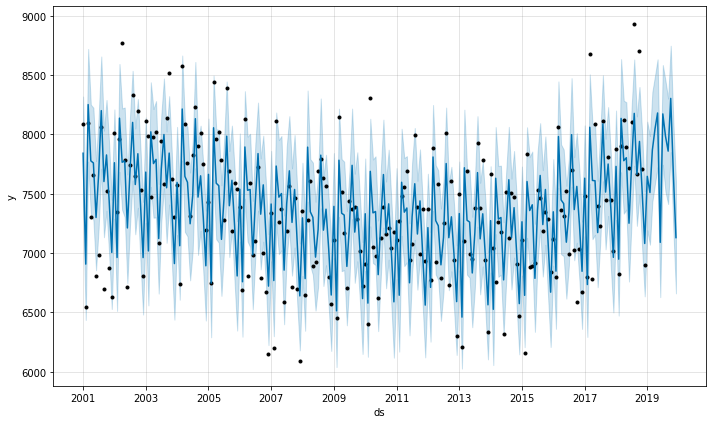

In [ ]:
prophet_model_trained.plot(prophet_results);



---


# **Leprosy**

# Time Series

In [ ]:
leprosy_cases = 'https://raw.githubusercontent.com/anaapbernardo/Bootcamp_DataScience/main/Files%20-%20Bootcamp%20Data%20Science/A125144189_28_143_208.csv'

In [ ]:
df_leprosy = pd.read_csv(leprosy_cases, encoding='ISO 8859-1', sep=';',
                 skiprows=3, skipfooter=11, engine='python')

df_leprosy.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,<1975,28,9,12,14,14,17,17,14,13,24,21,22,205
1,1975,-,1,-,-,-,-,-,-,-,-,-,1,2
2,1976,-,-,-,2,1,2,-,-,2,-,1,-,8
3,1977,2,-,-,1,-,-,-,-,-,1,1,-,5
4,1978,-,-,-,-,-,2,1,2,-,1,-,-,6


In [ ]:
# Removing unnecessary rows and column

df_leprosy.drop(index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 
                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 46, 47], 
                inplace=True )
df_leprosy.drop(columns='Total', inplace=True)
df_leprosy.reset_index(drop=True, inplace=True)

In [ ]:
# Using melt to make a time series data frame

df_date_leprosy = df_leprosy.melt(id_vars='Ano Diagnóstico', var_name='Month', value_name='Leprosy_Cases')
df_date_leprosy.rename(columns={'Ano Diagnóstico': 'Year'}, inplace=True)

In [ ]:
# Dictionary to convert months into numbers

months_dict = {
    'Jan' : '01',
    'Fev' : '02',
    'Mar' : '03',
    'Abr' : '04',
    'Mai' : '05',
    'Jun' : '06',
    'Jul' : '07',
    'Ago' : '08',
    'Set' : '09',
    'Out' : '10',
    'Nov' : '11',
    'Dez' : '12'
}

In [ ]:
# Convert the Months (str) into Months (int)

df_date_leprosy['Month'] = df_date_leprosy['Month'].map(months_dict)
df_date_leprosy['Date'] = df_date_leprosy['Year'].str.cat(df_date_leprosy['Month'], sep='-')
df_date_leprosy['Date'] = pd.to_datetime(df_date_leprosy['Date'], format='%Y-%m')

df_date_leprosy

,Year,Month,Leprosy_Cases,Date
0,2001,01,4107,2001-01-01
1,2002,01,3982,2002-01-01
2,2003,01,4127,2003-01-01
3,2004,01,4168,2004-01-01
4,2005,01,4078,2005-01-01
...,...,...,...,...
223,2015,12,2414,2015-12-01
224,2016,12,2214,2016-12-01
225,2017,12,2446,2017-12-01
226,2018,12,2276,2018-12-01


In [ ]:
# Creating a new data frame and sorting by date

selected_columns = ['Date', 'Leprosy_Cases']
df_timeseries_leprosy = df_date_leprosy.reindex(columns=selected_columns)
df_timeseries_leprosy.sort_values('Date', inplace=True)
df_timeseries_leprosy.reset_index(drop=True, inplace=True)
df_timeseries_leprosy['Leprosy_Cases'] = df_timeseries_leprosy['Leprosy_Cases'].astype(int)

df_timeseries_leprosy

,Date,Leprosy_Cases
0,2001-01-01,4107
1,2001-02-01,4103
2,2001-03-01,4787
3,2001-04-01,4135
4,2001-05-01,4724
...,...,...
223,2019-08-01,3224
224,2019-09-01,3211
225,2019-10-01,3322
226,2019-11-01,2993


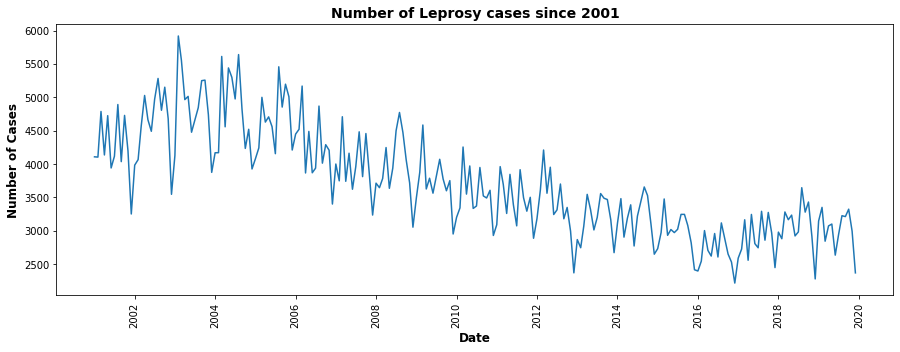

In [ ]:
# Data Visualization

plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Leprosy_Cases', data=df_timeseries_leprosy)

plt.xticks(rotation = 90)
plt.xlabel('Date', size=12, weight='bold')
plt.ylabel('Number of Cases', size=12, weight='bold')
plt.title('Number of Leprosy cases since 2001', size=14, weight='bold')

plt.show()

# Time Series Analysis

## Trends and Moving Average

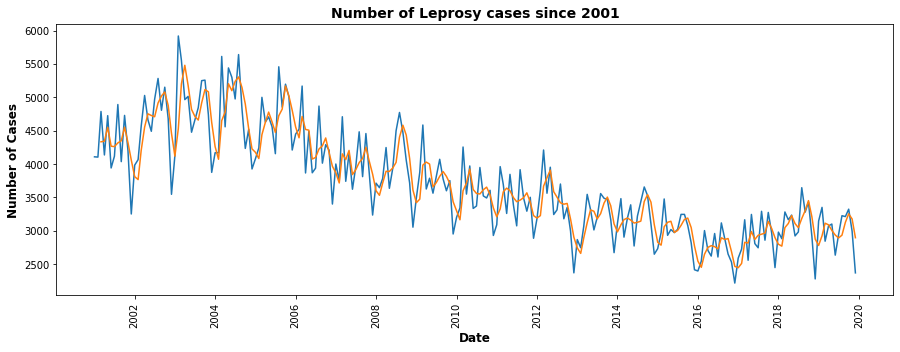

In [ ]:
# Moving average of 3 months

df_timeseries_leprosy['Moving_Avg3'] = df_timeseries_leprosy['Leprosy_Cases'].rolling(3).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Leprosy_Cases', data=df_timeseries_leprosy)
sns.lineplot(x='Date', y='Moving_Avg3', data=df_timeseries_leprosy)

plt.xticks(rotation = 90)
plt.xlabel('Date', size=12, weight='bold')
plt.ylabel('Number of Cases', size=12, weight='bold')
plt.title('Number of Leprosy cases since 2001', size=14, weight='bold')

plt.show()

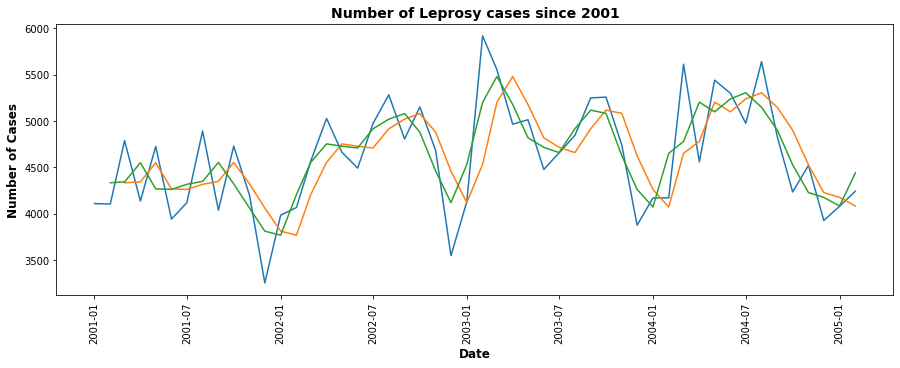

In [ ]:
# Centered moving average of 3 months

df_timeseries_leprosy['Moving_Avg3c'] = df_timeseries_leprosy['Leprosy_Cases'].rolling(3, center=True).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Leprosy_Cases', data=df_timeseries_leprosy[:50])
sns.lineplot(x='Date', y='Moving_Avg3', data=df_timeseries_leprosy[:50])
sns.lineplot(x='Date', y='Moving_Avg3c', data=df_timeseries_leprosy[:50])

plt.xticks(rotation = 90)
plt.xlabel('Date', size=12, weight='bold')
plt.ylabel('Number of Cases', size=12, weight='bold')
plt.title('Number of Leprosy cases since 2001', size=14, weight='bold')

plt.show()

# Decomposition and Autocorrelation

In [ ]:
df_timeseries_leprosy['Year'] = df_timeseries_leprosy['Date'].dt.year
df_timeseries_leprosy['Month'] = df_timeseries_leprosy['Date'].dt.month

df_timeseries_leprosy

,Date,Leprosy_Cases,Moving_Avg3,Moving_Avg3c,Year,Month
0,2001-01-01,4107,NaN,NaN,2001,1
1,2001-02-01,4103,NaN,4332.333333,2001,2
2,2001-03-01,4787,4332.333333,4341.666667,2001,3
3,2001-04-01,4135,4341.666667,4548.666667,2001,4
4,2001-05-01,4724,4548.666667,4266.333333,2001,5
...,...,...,...,...,...,...
223,2019-08-01,3224,2932.000000,3124.666667,2019,8
224,2019-09-01,3211,3124.666667,3252.333333,2019,9
225,2019-10-01,3322,3252.333333,3175.333333,2019,10
226,2019-11-01,2993,3175.333333,2894.000000,2019,11


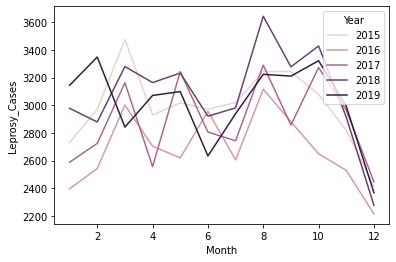

In [ ]:
sns.lineplot(x='Month', y='Leprosy_Cases', hue='Year', data=df_timeseries_leprosy.query('Year in [2015, 2016, 2017, 2018, 2019, 2020]'))

## Decompose

In [ ]:
df_timeseries_leprosy.set_index('Date', inplace=True)

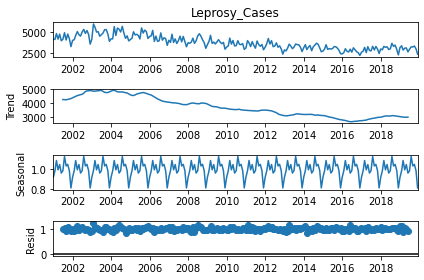

In [ ]:
decompose_leprosy = seasonal_decompose(df_timeseries_leprosy['Leprosy_Cases'], model='multiplicative')
decompose_leprosy.plot();

The multiplicative model better explains the data. It is possible to notice a tendency of decrease in the number of cases through the years. Also, there is seasonality in the data. 

## Autocorrelation

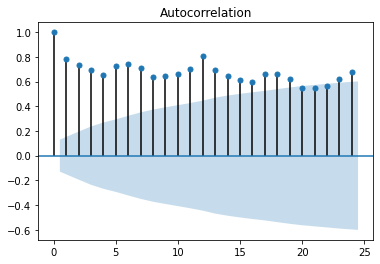

In [ ]:
plot_acf(df_timeseries_leprosy['Leprosy_Cases']);

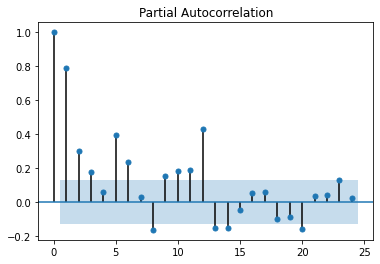

In [ ]:
plot_pacf(df_timeseries_leprosy['Leprosy_Cases']);

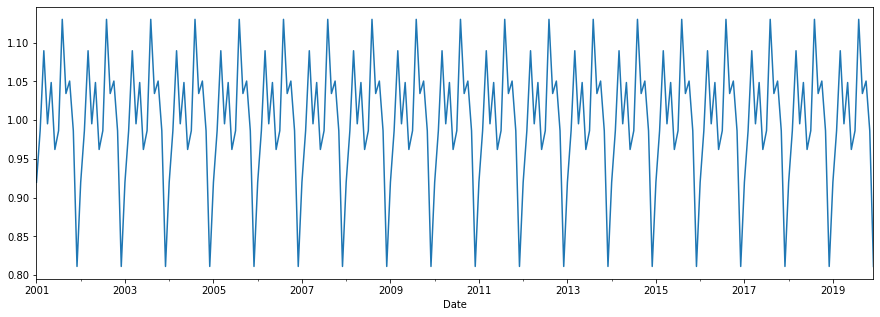

In [ ]:
plt.figure(figsize=(15, 5))

decompose_leprosy.seasonal.plot()

# Time Series Predictions

In [ ]:
data_train_leprosy = df_timeseries_leprosy.query('Year != 2019')
data_test_leprosy = df_timeseries_leprosy.query('Year == 2019')

In [ ]:
# Set and train the ARIMA model

arima_model_leprosy = ARIMA(data_train_leprosy['Leprosy_Cases'].values.astype('float32'), order=[12, 1, 1])
trained_arima_model_leprosy = arima_model_leprosy.fit()
prediction_leprosy = trained_arima_model_leprosy.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

In [ ]:
prediction_leprosy

array([2844.12017578, 2823.45838636, 3155.78923714, 3146.11775349,
       2991.73833388, 2825.04223207, 2864.03226292, 3286.77771555,
       3141.69506274, 3211.19413158, 2888.81947234, 2492.3853599 ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



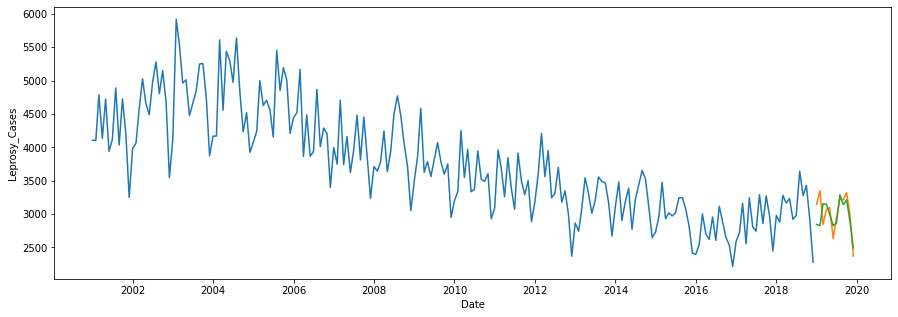

In [ ]:
data_test_leprosy['Prediction'] = prediction_leprosy

plt.figure(figsize=(15,5))

sns.lineplot(x='Date', y='Leprosy_Cases', data=data_train_leprosy)
sns.lineplot(x='Date', y='Leprosy_Cases', data=data_test_leprosy)
sns.lineplot(x='Date', y='Prediction', data=data_test_leprosy)

# AUTOARIMA

In [ ]:
# Create an autoarima model

autoarima_model_leprosy = auto_arima(data_train_leprosy['Leprosy_Cases'].values, error_action='ignore',
                             trace=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3141.933, Time=1.94 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3297.776, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3188.126, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3188.754, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3295.838, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.89 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=4.70 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=3144.566, Time=4.18 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.64 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=5.35 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=3127.167, Time=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



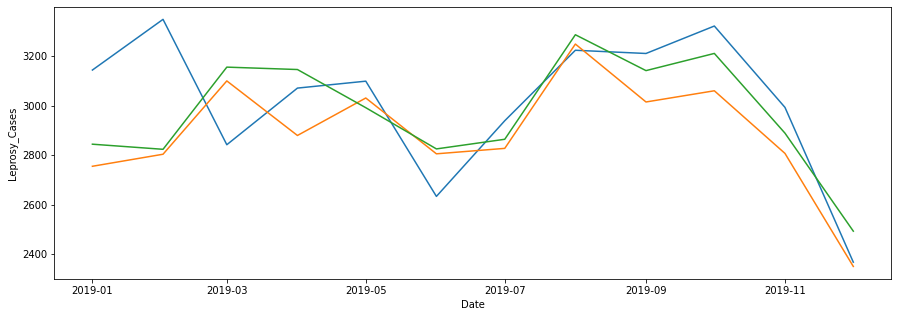

In [ ]:
# Plot the prediction models

prediction_autoarima_leprosy = autoarima_model_leprosy.predict(12)
data_test_leprosy["Prediction_Autoarima"] = prediction_autoarima_leprosy

plt.figure(figsize=(15,5))

sns.lineplot(x='Date', y='Leprosy_Cases', data=data_test_leprosy) #blue
sns.lineplot(x='Date', y='Prediction_Autoarima', data=data_test_leprosy) #orange
sns.lineplot(x='Date', y='Prediction', data=data_test_leprosy) #green

In [ ]:
autoarima_results_leprosy = mean_squared_error(data_test_leprosy['Leprosy_Cases'], data_test_leprosy['Prediction_Autoarima'])
arima_results_leprosy = mean_squared_error(data_test_leprosy['Leprosy_Cases'], data_test_leprosy['Prediction'])

print(f'MSE: \n Autoarima:{"%.2f" % autoarima_results} \n Arima:{"%.2f" % arima_results}')

MSE: 
 Autoarima:93378.93 
 Arima:131384.44


# Prophet

In [ ]:
# Reset index

data_train_leprosy.reset_index(inplace=True)

In [ ]:
# Set up the data frame

map_columns_leprosy = {'Date': 'ds', 'Leprosy_Cases': 'y'}
data_train_prophet_leprosy = data_train_leprosy[['Date', 'Leprosy_Cases']].rename(map_columns_leprosy,
                                                                 axis=1)

In [ ]:
# Create a Prophet Model

prophet_model_leprosy = Prophet(seasonality_mode='multiplicative')
prophet_model_trained_leprosy = prophet_model_leprosy.fit(data_train_prophet_leprosy)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_leprosy = prophet_model_trained_leprosy.make_future_dataframe(periods=12, freq='M')
future_leprosy

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
223,2019-07-31
224,2019-08-31
225,2019-09-30
226,2019-10-31


In [ ]:
prophet_results_leprosy = prophet_model_trained_leprosy.predict(future_leprosy)

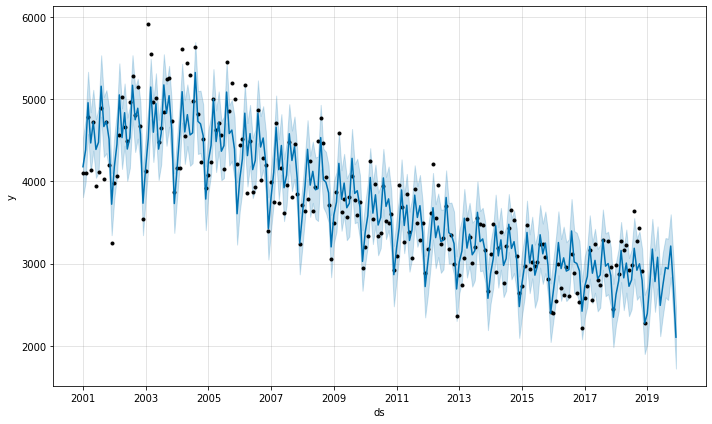

In [ ]:
prophet_model_trained_leprosy.plot(prophet_results_leprosy);